# **Machine Learning: A Practical Approach Using the Student Performance Dataset**
### This project uses the Student Performance dataset to build and evaluate machine learning models, predict student grades, and visualize key relationships in the data.

# **Step 1. Loading Libraries and Data**
### We start by loading essential libraries, including pandas for data handling, numpy for numerical operations, and matplotlib and seaborn for data visualization.

In [167]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization

# **pd.read_csv():** 
### Reads data from a CSV file into a pandas DataFrame, enabling easy data manipulation.


In [168]:
# Loading the Student Performance dataset
df = pd.read_csv("StudentsPerformance.csv")

# **Step 2. Exploring the Dataset**

In [169]:
# Displaying dataset head and checking its shape
print("Dataset Head:")
df.head()

Dataset Head:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [170]:
print("Dataset Tail:")
df.tail(10)

Dataset Tail:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [171]:
print("Dataset Shape:")
df.shape


Dataset Shape:


(1000, 8)

In [172]:
# Checking for missing values
print("Missing Values per Column:")
df.isnull().sum()

Missing Values per Column:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# **Statistical Overview Of Data**

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [174]:
df["gender"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [175]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [176]:
df.describe(include="O")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [177]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


# **Step 3. Data Visualization**
### This step provides various plots to explore the distribution of scores and comparisons by gender, race/ethnicity, and parental education.

# **1. Histogram of Math Scores**

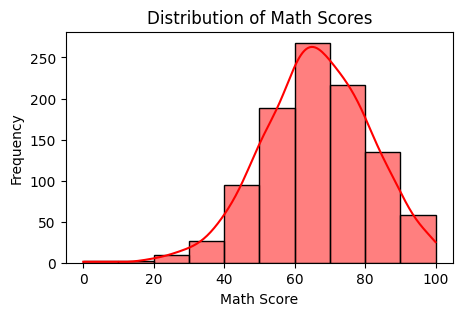

In [178]:
plt.figure(figsize=(5, 3)) # Adjusting figure size
sns.histplot(df['math score'], bins=10, kde=True,color="red")#Creates a histogram with kernel density estimation (kde) for the 'math score' column.
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


# **2. Bar Plot of Writing Scores by Gender**

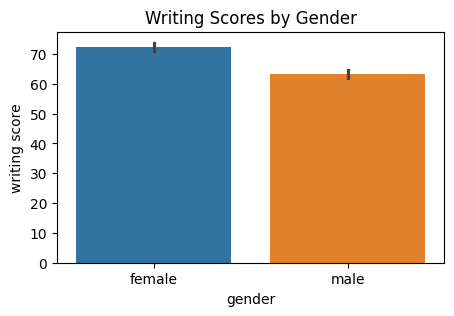

In [179]:
plt.figure(figsize=(5, 3))
sns.barplot(x='gender', y='writing score', data=df,hue="gender")
plt.title('Writing Scores by Gender')
plt.show()

# **3. Bar Plot of Maths Scores by Gender**

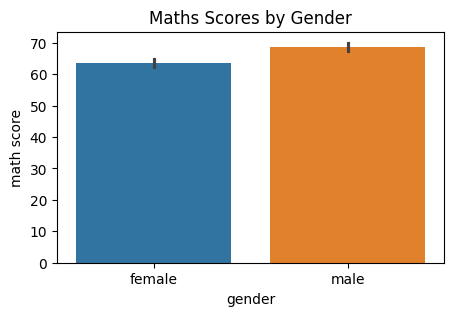

In [180]:
plt.figure(figsize=(5, 3))
sns.barplot(x='gender', y='math score', data=df,hue="gender")
plt.title('Maths Scores by Gender')
plt.show()

# **4. Bar Plot of Maths Scores by Gender**

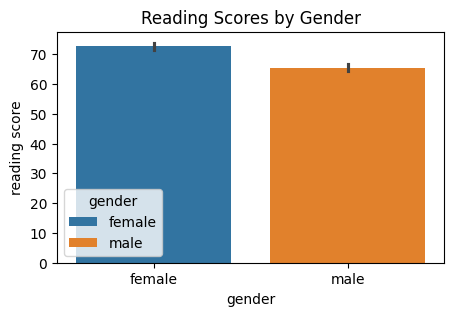

In [181]:

plt.figure(figsize=(5, 3))
sns.barplot(x='gender', y='reading score',hue="gender", data=df,legend=["Female","Male"])
plt.title('Reading Scores by Gender')
plt.show()

# **5. Group vice comparison of writing score marks using bar plot**

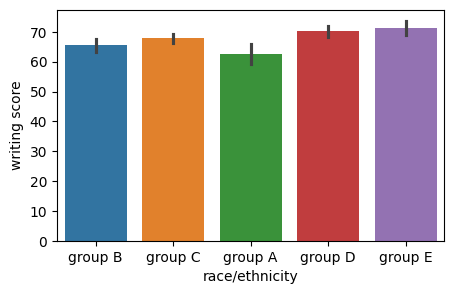

In [182]:
plt.figure(figsize=(5,3))
sns.barplot(x="race/ethnicity",y="writing score",hue="race/ethnicity",data=df)
plt.show()

# **6. Bar Plot of Average Scores by Parental Level of Education**

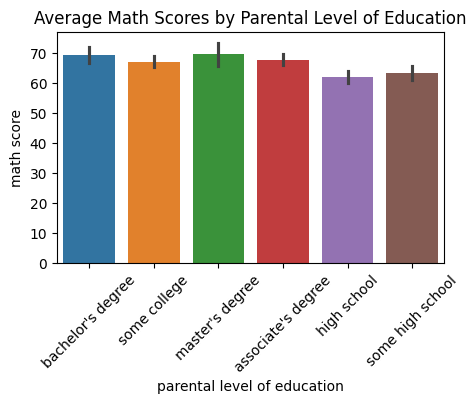

In [183]:

plt.figure(figsize=(5, 3))
sns.barplot(x='parental level of education', y='math score', data=df,hue="parental level of education")
plt.title('Average Math Scores by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

# **Step 4: Data PreProcessing**
- ### Removing unusuall columns
- ### filling null values
- ### removing duplicates
- ### encoding categorical variables
- ### scaling/normalizing data
- ### Feature enginerring
- ### Feature selection

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **Droping unusuall columns**

In [185]:
columns_to_remove=["gender","race/ethnicity","parental level of education","lunch","test preparation course"]
df.drop(columns_to_remove,inplace=True,axis=1)

In [186]:
df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


## **Finding null values in columns/features**

In [187]:
df.isnull()

,math score,reading score,writing score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [188]:
print("Sum of null values in each column:")
df.isnull().sum()

Sum of null values in each column:


math score       0
reading score    0
writing score    0
dtype: int64

# **Feature Enginerring**

In [189]:
Average_marks=[]
for math_mark,writing_mark,read_mark in df[["math score","writing score","reading score"]].values:
    average_mark=(math_mark+writing_mark+read_mark)/3
    Average_marks.append(average_mark)

In [190]:
Average_marks

[np.float64(72.66666666666667),
 np.float64(82.33333333333333),
 np.float64(92.66666666666667),
 np.float64(49.333333333333336),
 np.float64(76.33333333333333),
 np.float64(77.33333333333333),
 np.float64(91.66666666666667),
 np.float64(40.666666666666664),
 np.float64(65.0),
 np.float64(49.333333333333336),
 np.float64(54.666666666666664),
 np.float64(45.0),
 np.float64(73.0),
 np.float64(73.33333333333333),
 np.float64(53.666666666666664),
 np.float64(74.0),
 np.float64(87.66666666666667),
 np.float64(26.0),
 np.float64(44.666666666666664),
 np.float64(57.666666666666664),
 np.float64(66.0),
 np.float64(70.0),
 np.float64(50.333333333333336),
 np.float64(71.66666666666667),
 np.float64(75.0),
 np.float64(73.0),
 np.float64(59.333333333333336),
 np.float64(70.33333333333333),
 np.float64(68.33333333333333),
 np.float64(69.0),
 np.float64(72.33333333333333),
 np.float64(63.0),
 np.float64(64.33333333333333),
 np.float64(40.0),
 np.float64(88.66666666666667),
 np.float64(80.333333333333

In [191]:
Average_marks=pd.DataFrame(Average_marks,columns=["Average_marks"]) # making dataframe for better view

In [192]:
Average_marks

,Average_marks
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


In [193]:
df["Average marks"]=Average_marks # Adding new column named average marks in our dataset

In [194]:
df.head()

,math score,reading score,writing score,Average marks
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


# **Generating labels using average marks column**

In [195]:
Grades=[]
for marks in df["Average marks"].values:
    if marks >= 90:
        Grades.append('A')
    elif marks >= 80:
        Grades.append('B')
    elif marks >= 70:
        Grades.append('C')
    elif marks >= 60:
        Grades.append('D')
    elif marks >= 50:
        Grades.append('E')
    else:
        Grades.append('F')


In [196]:
Grades

['C',
 'B',
 'A',
 'F',
 'C',
 'C',
 'A',
 'F',
 'D',
 'F',
 'E',
 'F',
 'C',
 'C',
 'E',
 'C',
 'B',
 'F',
 'F',
 'E',
 'D',
 'C',
 'E',
 'C',
 'C',
 'C',
 'E',
 'C',
 'D',
 'D',
 'C',
 'D',
 'D',
 'F',
 'B',
 'B',
 'C',
 'E',
 'B',
 'E',
 'E',
 'D',
 'E',
 'D',
 'E',
 'E',
 'D',
 'C',
 'D',
 'B',
 'E',
 'C',
 'F',
 'B',
 'B',
 'F',
 'B',
 'E',
 'E',
 'F',
 'C',
 'F',
 'E',
 'C',
 'E',
 'D',
 'F',
 'D',
 'E',
 'E',
 'D',
 'D',
 'F',
 'E',
 'F',
 'F',
 'F',
 'C',
 'D',
 'D',
 'F',
 'F',
 'E',
 'D',
 'F',
 'C',
 'B',
 'C',
 'D',
 'B',
 'C',
 'F',
 'C',
 'F',
 'B',
 'B',
 'D',
 'D',
 'D',
 'D',
 'C',
 'C',
 'B',
 'E',
 'A',
 'D',
 'A',
 'D',
 'D',
 'D',
 'B',
 'E',
 'E',
 'E',
 'A',
 'C',
 'B',
 'C',
 'E',
 'D',
 'B',
 'A',
 'A',
 'E',
 'C',
 'B',
 'D',
 'C',
 'C',
 'E',
 'B',
 'F',
 'C',
 'B',
 'C',
 'E',
 'F',
 'D',
 'D',
 'D',
 'C',
 'D',
 'E',
 'F',
 'C',
 'F',
 'B',
 'D',
 'C',
 'A',
 'D',
 'C',
 'D',
 'E',
 'D',
 'B',
 'C',
 'D',
 'C',
 'D',
 'C',
 'B',
 'E',
 'E',
 'B',
 'A',
 'E'

In [197]:
df["Grade"]=Grades

In [198]:
df.head()

,math score,reading score,writing score,Average marks,Grade
0,72,72,74,72.666667,C
1,69,90,88,82.333333,B
2,90,95,93,92.666667,A
3,47,57,44,49.333333,F
4,76,78,75,76.333333,C


# **Feature Mapping A Data PreProcessing Technique For Manually Encoding**

In [199]:
categories={
    "A":0,
    "B":1,
    "C":3,
    "D":4,
    "E":5,
    "F":6,
}
df["Grade"]=df["Grade"].map(categories)

# **Using Prebuilt function named LabelEncoder for Automated Encoding**

In [200]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [201]:
df["Grade"]=encoder.fit_transform(df["Grade"])
df.head()

,math score,reading score,writing score,Average marks,Grade
0,72,72,74,72.666667,2
1,69,90,88,82.333333,1
2,90,95,93,92.666667,0
3,47,57,44,49.333333,5
4,76,78,75,76.333333,2


# **Checking Coorelation b/w columns/features**

<Axes: >

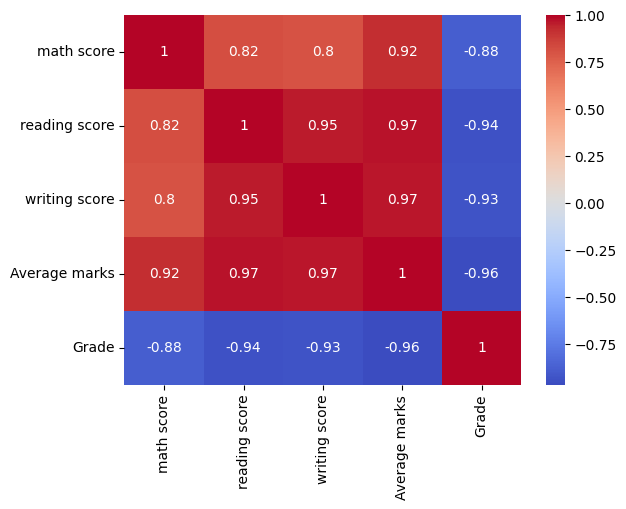

In [202]:
cor=df[["math score",  "reading score",  "writing score",  "Average marks","Grade"]].corr()
sns.heatmap(cor,annot=True,cmap="coolwarm")

### In our project, the inverse correlation between average marks and grade might be occurring because grades in the dataset are mapped in reverse order, where a higher grade (e.g., 'A') is represented by a lower number (0) and a lower grade (e.g., 'F') is represented by a higher number (5). In such cases, the correlation between **Average marks** and **Grade** will be negative, as higher average marks correspond to lower numerical grades, and vice versa.

### **Example Mapping:**
| Grade | Numerical Value |
|-------|-----------------|
| A     | 0               |
| B     | 1               |
| C     | 2               |
| D     | 3               |
| E     | 4               |
| F     | 5               |

### **Explanation of Inverse Correlation**
The correlation coefficient reflects the direction and strength of a linear relationship between two variables. In our case:
- **Higher average marks** correspond to **lower grades (e.g., A or B)**.
- **Lower average marks** correspond to **higher grades (e.g., F)**.

This pattern results in a negative correlation because:
1. When **average marks increase**, **grades decrease** in terms of numerical value (e.g., 1 to 0).
2. Conversely, when **average marks decrease**, **grades increase** numerically (e.g., 0 to 5).

### **Solution or Alternative Interpretation**
To avoid this inverse correlation and represent grades in a way where higher grades align with higher scores, we can reverse the mapping so that an "A" grade gets a higher numeric value, or interpret the negative correlation as indicating that high marks correspond to high performance (i.e., a lower grade in the original mapping).

# **Feature Selection**

In [203]:
columns_to_keep=["Average marks","Grade"]
df=df[columns_to_keep]

In [204]:
df.head(10)

,Average marks,Grade
0,72.666667,2
1,82.333333,1
2,92.666667,0
3,49.333333,5
4,76.333333,2
5,77.333333,2
6,91.666667,0
7,40.666667,5
8,65.000000,3
9,49.333333,5


# **Step 5: Model Preparation**
### Before building models, we  split the data into training and testing sets.

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
# Splitting data into features (X) and target (y)
X=df[["Average marks"]].values 
y=df["Grade"].values

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [208]:
print(X_train.shape)
print(y_train.shape)


(800, 1)
(800,)


# **Step 6: Training and Evaluating Models**
### We train two models—Naive Bayes and Decision Tree—and evaluate their accuracy and classification performance.

# **Naive Bayes : GaussionNB Model**

In [209]:
from sklearn.naive_bayes import GaussianNB

In [210]:
gnb=GaussianNB()

In [211]:
gnb.fit(X_train,y_train)

GaussianNB()

In [212]:
y_pred=gnb.predict(X_test)

In [213]:
gnb.score(X_test,y_test)

0.985

In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<Axes: >

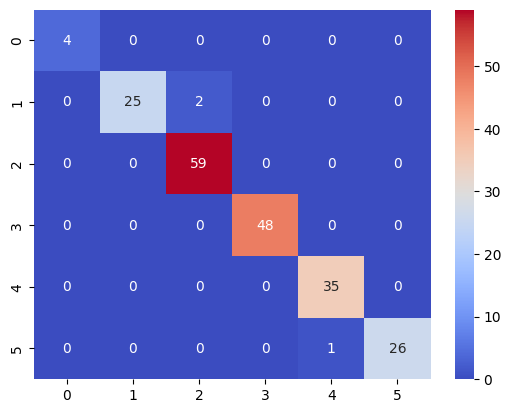

In [215]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="coolwarm")

In [216]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.93      0.96        27
           2       0.97      1.00      0.98        59
           3       1.00      1.00      1.00        48
           4       0.97      1.00      0.99        35
           5       1.00      0.96      0.98        27

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.98      0.98       200



# **DecisionTreeClassifier Model**

In [217]:
from sklearn.tree import DecisionTreeClassifier

In [218]:
dtc=DecisionTreeClassifier()

In [219]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [220]:
y_pred=dtc.predict(X_test)

In [221]:
dtc.score(X_test,y_test)

1.0

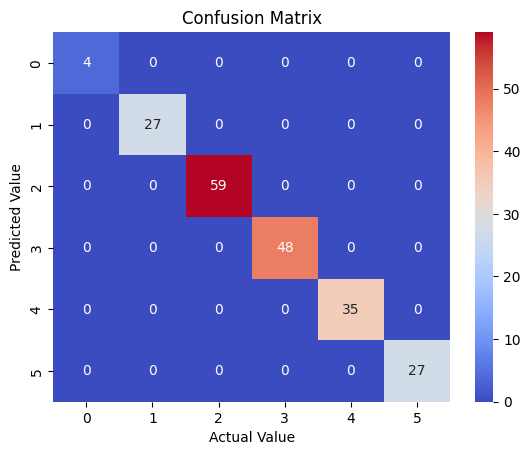

In [222]:
dtc_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(dtc_cm,annot=True,cmap="coolwarm")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix")
plt.show()

In [223]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        27

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **Step 7. Making Predictions with a Custom Function**
### We define a function to predict grades based on average marks, with input validation.

In [224]:
def predict(avg_marks):
    if ((avg_marks>100) | (avg_marks<0)):
        print("Plz Enter Between 0-100")
    else:
        pred=dtc.predict([[avg_marks]])
        return pred
            

In [225]:
pred=predict(89)

In [226]:
if pred:
    if pred == 0:
        print('The Predicted Grade is A')
    elif pred == 1:
        print('The Predicted Grade is B')
    elif pred == 2:
        print('The Predicted Grade is C')
    elif pred == 3:
        print('The Predicted Grade is D')
    elif pred == 4:
        print('The Predicted Grade is E')
    else:
        print('The Predicted Grade is F')
else:
    print("No value to predict")


The Predicted Grade is B


# **Step 8. Saving the Model**
### We save the trained Decision Tree model to reuse it without retraining.

In [227]:
import joblib # using joblib library for saving the model

### **joblib.dump():** Saves the model as a .joblib file, making it easy to load for future predictions without retraining.

In [229]:
joblib.dump(dtc,"Saved_model.joblib")

['Saved_model.joblib']

# **Conclusion:**

### This project explored the **Student Performance** dataset to analyze patterns in student scores and predict grades based on their average marks using **Naive Bayes** and **Decision Tree** classifiers. Data visualizations helped uncover insights like score distributions across subjects and influences of gender and parental education on performance. An inverse correlation between average marks and grade values was identified, due to grade mapping where higher grades (e.g., "A") were assigned lower numerical values. This approach introduces students to data preprocessing, feature engineering, and the importance of interpreting model results in the context of data mappings, offering a foundational experience in machine learning.